<a href="https://colab.research.google.com/github/felixzhao/title_catgories_classification/blob/main/JTC_V1.1_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=8df6aec85141cb1a4a5679b88daa1f1bc138f8d09ae3a8c42329d225d9e597a1
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
import numpy as np

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

from sentence_transformers import SentenceTransformer, util
from sklearn import metrics

load data
This work loads data from google drive. Please put the files into "trademe_data" folder under the root of google drive.

Then run the following code to mount the google drive in colab.

You can follow the guide. https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_path = "drive/MyDrive/trademe_data/"

Mounted at /content/drive


load raw data

In [ ]:
raw_df = pd.read_csv(f"{root_path}raw.csv")
raw_df.head()

,Unnamed: 0,x_title,y_cat_id,cat_1,cat_2,cat_3,x_title_feature
0,0,unqualified asbestos remover,5192,trades & services,labourers,labourers,unqualified asbestos remover
1,1,senior test analyst,5123,it,testing,testing,senior test analyst
2,2,ict trainer / supervisor,6894,education,tutoring & training,tutoring & training,ict trainer supervisor
3,3,automotive specialists *multi faceted position*,5197,trades & services,technicians,technicians,automotive specialists multi faceted position
4,4,business analyst,5114,it,business & systems analysts,business & systems analysts,business analyst


# generate embedding col

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
raw_df['x_title_encoding'] = raw_df['x_title_feature'].map(str).apply(lambda x: model.encode(
                x, convert_to_tensor=True
            ))

In [ ]:
raw_df['x_title_encoding_array'] = raw_df['x_title_encoding'].apply(np.array)

In [ ]:
raw_df.head(1)

,Unnamed: 0,x_title,y_cat_id,cat_1,cat_2,cat_3,x_title_feature,x_title_encoding,x_title_encoding_array
0,0,unqualified asbestos remover,5192,trades & services,labourers,labourers,unqualified asbestos remover,"[tensor(-0.0663), tensor(0.0821), tensor(0.047...","[-0.066275, 0.08206838, 0.046970565, 0.0162080..."


# Save file for TensorBoard

In [ ]:
matrix = np.vstack(raw_df['x_title_encoding_array'].values)

In [ ]:
len(matrix[0])

384

In [ ]:
import csv

In [ ]:
with open(f"feature_vecs.tsv", "w") as fw:
    csv_writer = csv.writer(fw, delimiter="\t")
    csv_writer.writerows(matrix)

In [ ]:
raw_df["metadata_labels"] = raw_df['cat_3'].to_numpy() + '\\' + raw_df['x_title'].to_numpy()
labels = raw_df["metadata_labels"].to_numpy()
labels

array(['labourers\\unqualified asbestos remover',
       'testing\\senior test analyst',
       'tutoring & training\\ict trainer / supervisor', ...,
       'civil & structural\\civil site engineer',
       'supervisors & forepersons\\senior scaffolder',
       'mental health\\registered mental health professional'],
      dtype=object)

In [ ]:
with open(f"metadata.tsv", "w") as file: 
    for label in labels:
        file.write(f"{label}\n")

# T-SNE

In [ ]:
tsne = TSNE(
    n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200
)

In [ ]:
matrix = np.vstack(raw_df['x_title_encoding_array'].values)
vis_dims2 = tsne.fit_transform(matrix)

In [ ]:
raw_df.head(1)

,Unnamed: 0,x_title,y_cat_id,cat_1,cat_2,cat_3,x_title_feature,x_title_encoding,x_title_encoding_array,metadata_labels
0,0,unqualified asbestos remover,5192,trades & services,labourers,labourers,unqualified asbestos remover,"[tensor(-0.0663), tensor(0.0821), tensor(0.047...","[-0.066275, 0.08206838, 0.046970565, 0.0162080...",labourers\unqualified asbestos remover


In [ ]:
tdf = pd.DataFrame(vis_dims2, columns=['x','y'])
tdf.head(1)

,x,y
0,-68.791039,70.206833


In [ ]:
raw_tsne_df = pd.concat([raw_df, tdf], axis=1)
raw_tsne_df.head(1)

,Unnamed: 0,x_title,y_cat_id,cat_1,cat_2,cat_3,x_title_feature,x_title_encoding,x_title_encoding_array,metadata_labels,x,y
0,0,unqualified asbestos remover,5192,trades & services,labourers,labourers,unqualified asbestos remover,"[tensor(-0.0663), tensor(0.0821), tensor(0.047...","[-0.066275, 0.08206838, 0.046970565, 0.0162080...",labourers\unqualified asbestos remover,-68.791039,70.206833


In [ ]:
len(matrix[0])

384

In [ ]:
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]



In [ ]:
vis_dims2

array([[-68.79104  ,  70.20683  ],
       [-29.842903 ,  73.1146   ],
       [  3.7928941,  48.21342  ],
       ...,
       [-49.497387 ,  43.131382 ],
       [-28.108482 , -72.9443   ],
       [ 79.22421  ,  23.576426 ]], dtype=float32)

In [ ]:
tdf = pd.DataFrame(vis_dims2, columns=['x','y'])

In [ ]:
tdf

,x,y
0,-68.791039,70.206833
1,-29.842903,73.114601
2,3.792894,48.213421
3,-65.814323,19.350677
4,-11.896369,77.373192
...,...,...
19995,-12.044889,57.190510
19996,-5.217261,11.278253
19997,-49.497387,43.131382
19998,-28.108482,-72.944298


In [ ]:
for category, color in enumerate(["purple", "green", "red", "blue", "black", "darkblue", "orange", "darkred"]):
    xs = np.array(x)[corpus_df.Cluster == category]
    ys = np.array(y)[corpus_df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

# tsne plot

In [ ]:
raw_tsne_df.head(1)

,Unnamed: 0,x_title,y_cat_id,cat_1,cat_2,cat_3,x_title_feature,x_title_encoding,x_title_encoding_array,metadata_labels,x,y
0,0,unqualified asbestos remover,5192,trades & services,labourers,labourers,unqualified asbestos remover,"[tensor(-0.0663), tensor(0.0821), tensor(0.047...","[-0.066275, 0.08206838, 0.046970565, 0.0162080...",labourers\unqualified asbestos remover,-68.791039,70.206833


Reference: 
https://stackoverflow.com/questions/46819664/how-to-add-labels-to-t-sne-in-python

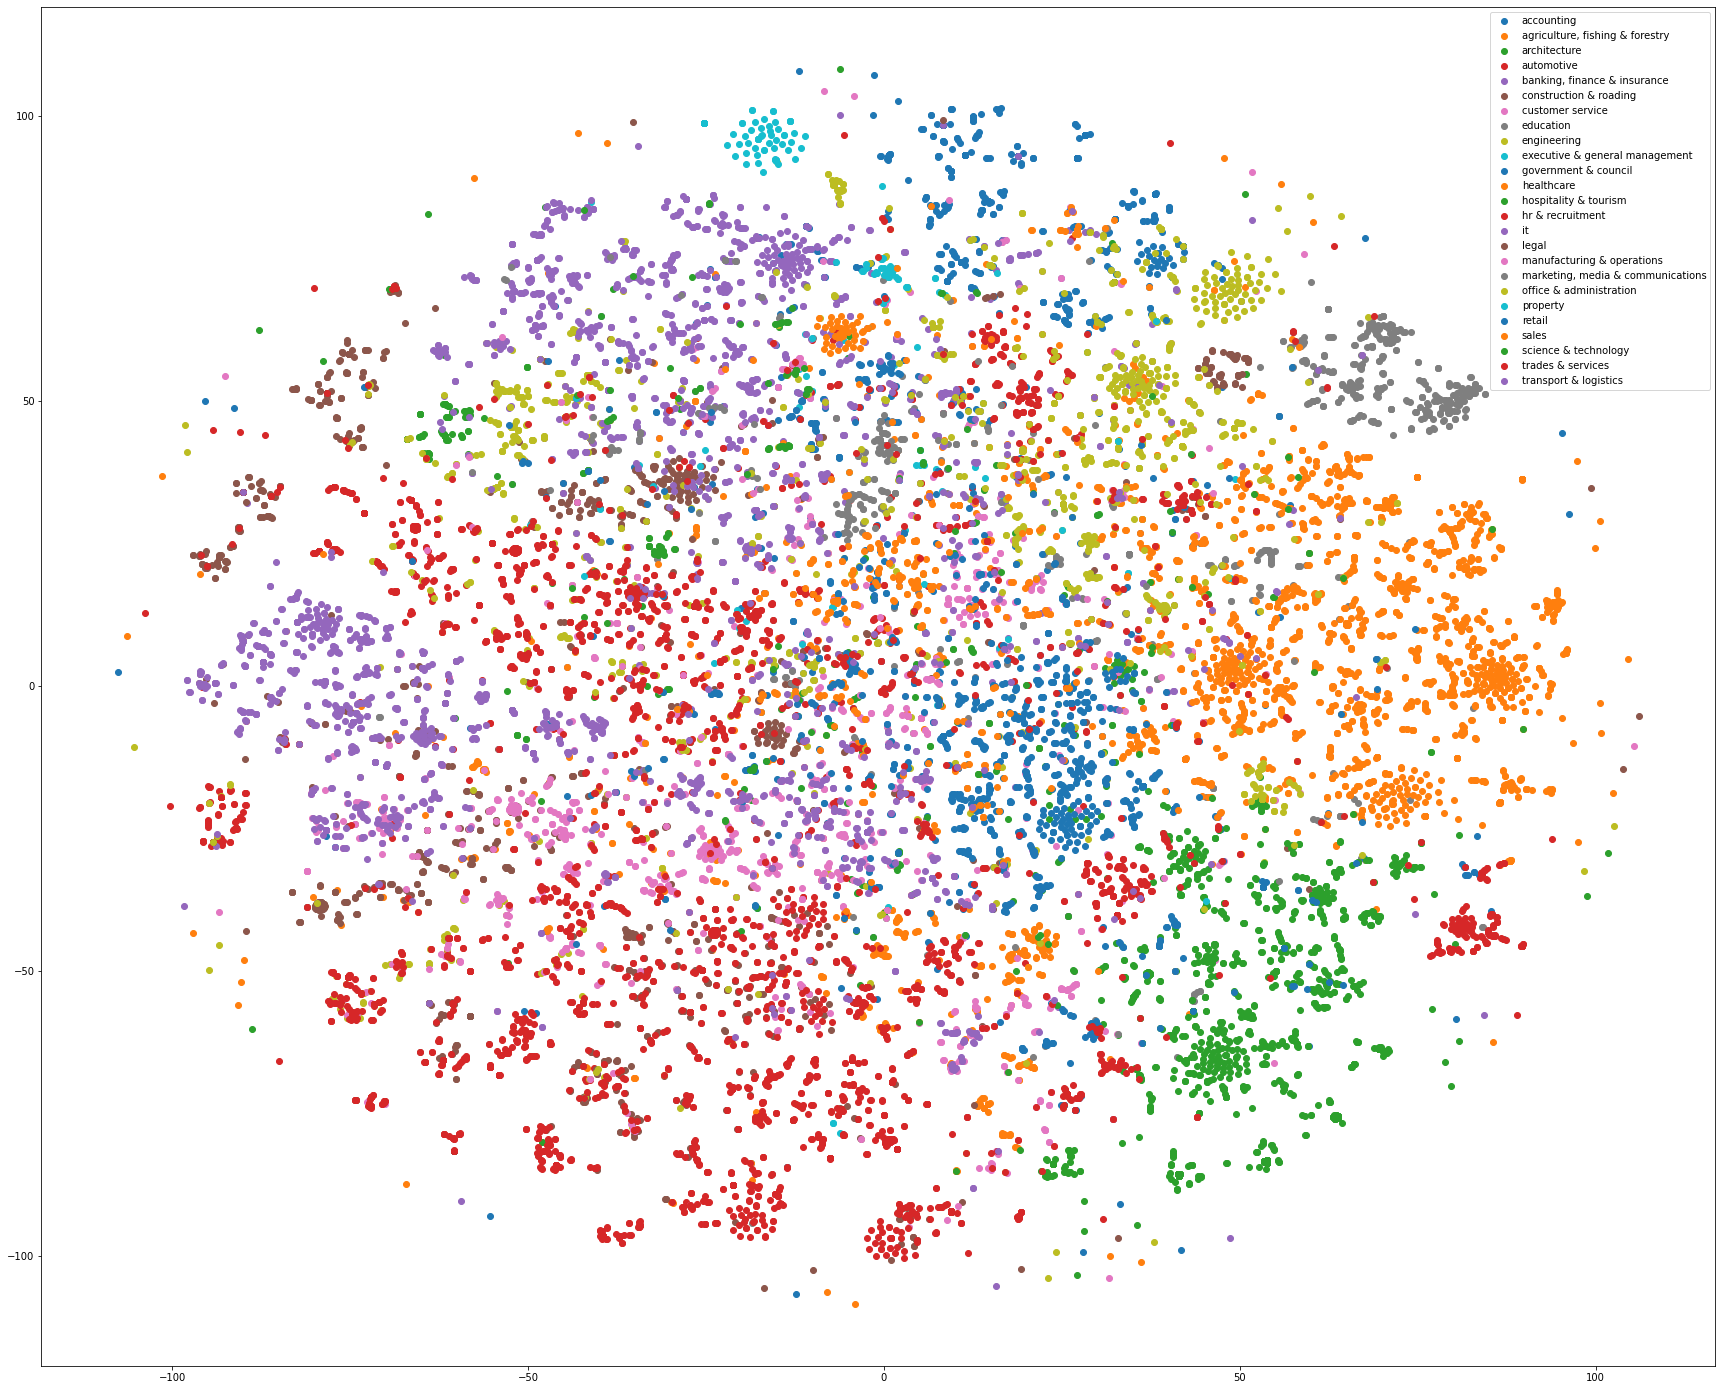

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 25)

# groups = pd.DataFrame(raw_tsne_df, columns=['0', '1']).assign(category=y).groupby('cat_3')
groups = raw_tsne_df.groupby('cat_1')
for name, points in groups:
    ax.scatter(points['x'], points['y'], label=name)

ax.legend(loc='best') #, bbox_to_anchor=(0.5, 0., 0.5, 0.5))

We can see there some clear cluster for the top categories